In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load the dataset
data = pd.read_csv('/Users/Selma/dev/STAT3007-timeseries_forecasting/data/dataeqnr_max_daily.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
0,2001-06-18 00:00:00-04:00,2.507967,2.514673,2.504614,2.504614,7189500,0.0,0.0,-0.973381
1,2001-06-19 00:00:00-04:00,2.531437,2.591789,2.531437,2.554907,1410700,0.0,0.0,-0.970356
2,2001-06-20 00:00:00-04:00,2.575024,2.578377,2.551554,2.561612,550400,0.0,0.0,-0.969953
3,2001-06-21 00:00:00-04:00,2.538142,2.548201,2.531436,2.538142,643600,0.0,0.0,-0.971364
4,2001-06-22 00:00:00-04:00,2.521378,2.531436,2.507966,2.518025,822600,0.0,0.0,-0.972574


In [4]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Scaled_close
count,5746.000000,5746.000000,5746.000000,5746.000000,5.746000e+03,5746.000000,5746.0,5746.000000
mean,12.881634,12.997722,12.753676,12.878822,1.755979e+06,0.004366,0.0,-0.349428
std,6.747966,6.806535,6.680635,6.744742,1.570995e+06,0.061041,0.0,0.405660
min,2.062031,2.088854,2.045266,2.062032,5.900000e+03,0.000000,0.0,-1.000000
25%,9.699856,9.852180,9.561369,9.739879,6.397250e+05,0.000000,0.0,-0.538218
50%,12.230827,12.329211,12.114343,12.228000,1.424000e+06,0.000000,0.0,-0.388571
75%,14.935843,15.017568,14.785280,14.908623,2.451625e+06,0.000000,0.0,-0.227346
max,35.315174,35.811977,34.944677,35.315182,1.448510e+07,1.659000,0.0,1.000000


In [5]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Scaled_close    0
dtype: int64

In [6]:
data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Scaled_close    0
dtype: int64

In [7]:
# Checking Data type of each column
print("Date column data type: ", type(data['Date'][0]))
print("Open column data type: ", type(data['Open'][0]))
print("Close column data type: ", type(data['Close'][0]))
print("High column data type: ", type(data['High'][0]))
print("Low column data type: ", type(data['Low'][0]))
print("Volume column data type: ", type(data['Volume'][0]))
print("Dividens column data type: ", type(data['Dividends'][0]))
print("Stock splits column data type: ", type(data['Stock Splits'][0]))
print("Scaled close column data type: ", type(data['Scaled_close'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>
Volume column data type:  <class 'numpy.int64'>
Dividens column data type:  <class 'numpy.float64'>
Stock splits column data type:  <class 'numpy.float64'>
Scaled close column data type:  <class 'numpy.float64'>


In [8]:
data.shape

(5746, 9)

/Users/Selma/anaconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


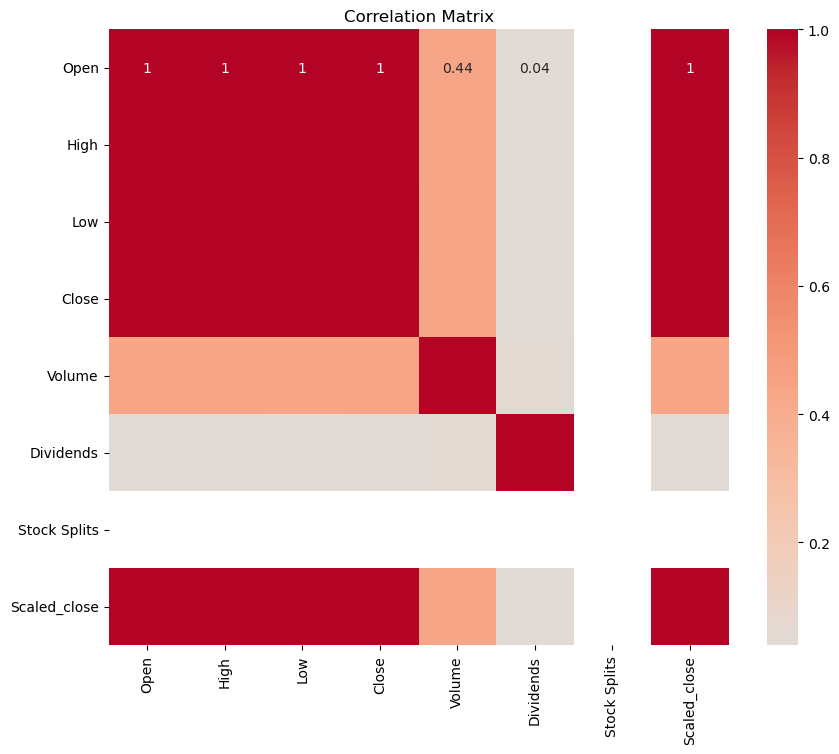

In [9]:
corr_data = data.drop(columns='Date')
correlation_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

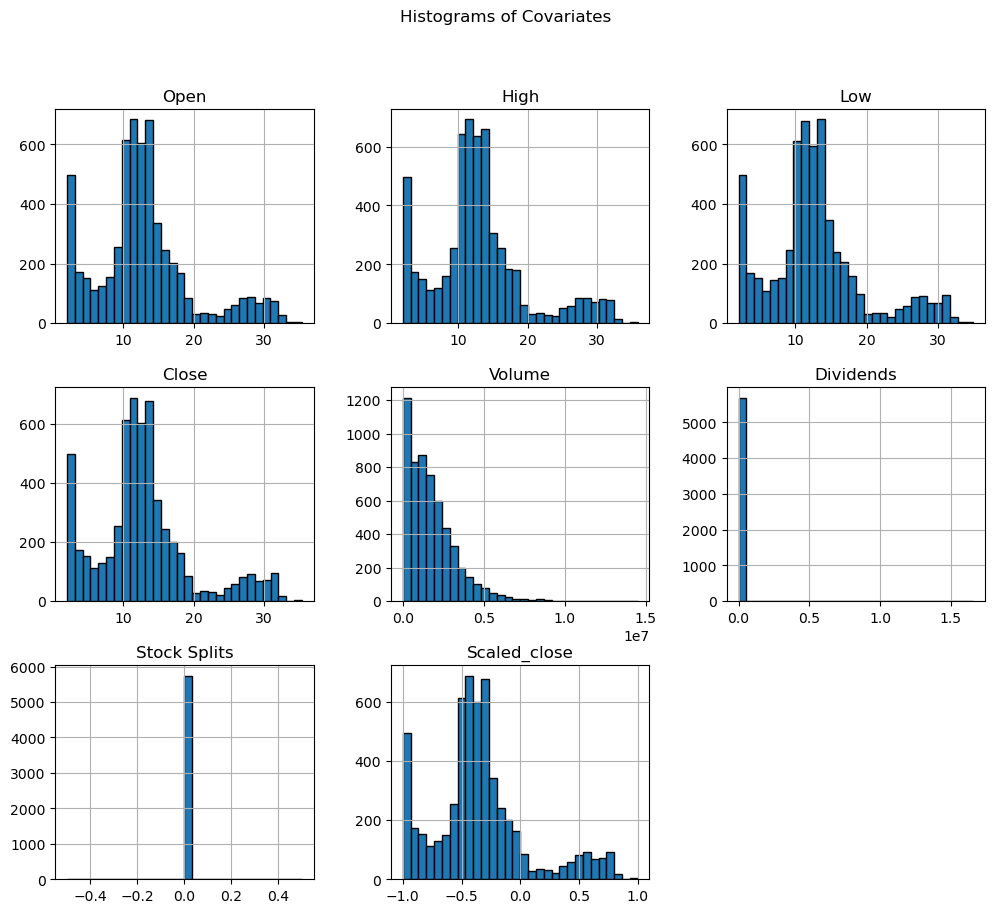

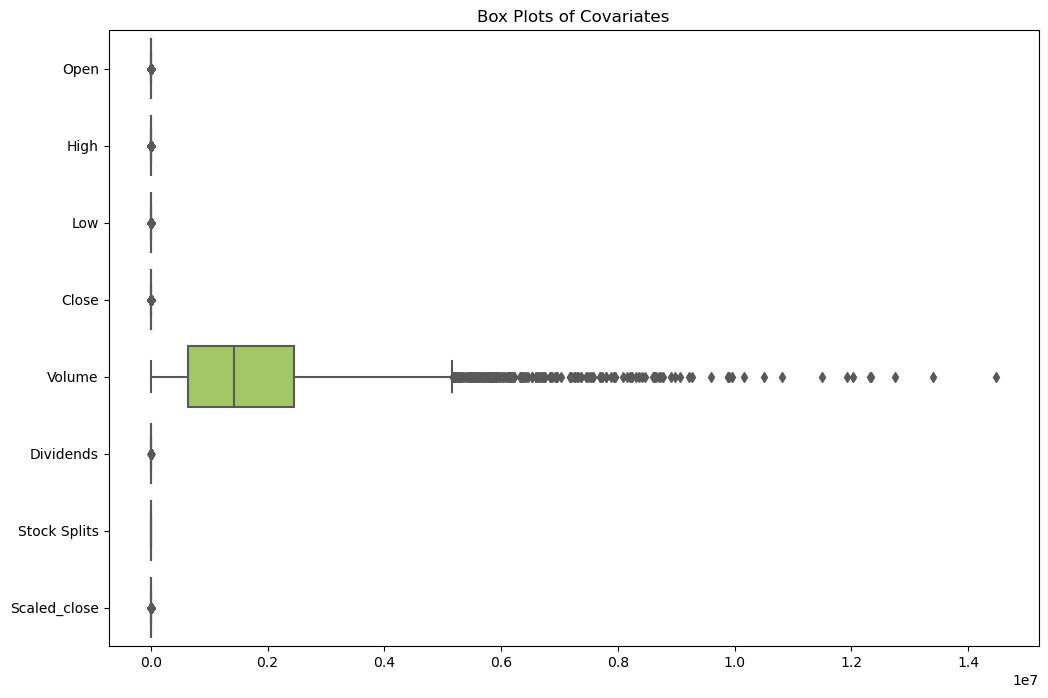

In [21]:
# Histograms
corr_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Covariates')
plt.show()

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=corr_data, orient='h', palette='Set2')
plt.title('Box Plots of Covariates')
plt.show()

In [10]:
# Convert date column to datetime and order ascendingly
data['Date'] = pd.to_datetime(data["Date"], utc=True)
data = data.sort_values(by='Date', ascending=True)

# Get the starting date (first date in the sorted DataFrame)
starting_date = data.iloc[0]['Date']

# Get the ending date (last date in the sorted DataFrame)
ending_date = data.iloc[-1]['Date']

print(f"Starting date: {starting_date}")
print(f"Ending date: {ending_date}")
print("Duration: ", ending_date - starting_date)

Starting date: 2001-06-18 04:00:00+00:00
Ending date: 2024-04-19 04:00:00+00:00
Duration:  8341 days 00:00:00


In [11]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,12.817948,12.827346
February,12.811288,12.819361
March,12.986229,12.997519
April,13.272580,13.280338
May,13.191533,13.173195
June,12.945904,12.934421
July,12.541216,12.544227
August,12.731713,12.732333
September,12.911890,12.903977


In [12]:
# Calculate the difference between 'value1' and 'value2'
monthvise['Difference'] = monthvise['Open'] - monthvise['Close']
monthvise

,Open,Close,Difference
Date,,,
January,12.817948,12.827346,-0.009398
February,12.811288,12.819361,-0.008073
March,12.986229,12.997519,-0.011291
April,13.272580,13.280338,-0.007758
May,13.191533,13.173195,0.018339
June,12.945904,12.934421,0.011484
July,12.541216,12.544227,-0.003010
August,12.731713,12.732333,-0.000620
September,12.911890,12.903977,0.007914


In [13]:
fig = px.line(monthvise, x=monthvise.index, y=['Open', 'Close'],
              labels={'value': 'Price', 'index': 'Month'},
              title='Average Open and Close Price by Month')

# Show the plot
fig.show()

In [14]:
fig = px.bar(monthvise, x=monthvise.index, y=['Open', 'Close'],
             barmode='group',
             labels={'value': 'Price', 'index': 'Month'},
             title='Average Open and Close Prices by Month')

# Show the plot
fig.show()

In [15]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [17]:
closed_df = data[["Date", "Close"]]

In [18]:
fig = px.line(closed_df, x=closed_df["Date"], y=closed_df["Close"],labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()